In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from fetcher3 import fetch_links
from networkx.algorithms.cluster import average_clustering, transitivity
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length as avg_diameter
from networkx.algorithms.distance_measures import diameter as max_diameter

In [2]:
# Initialize graph
G = nx.DiGraph()

pageCount = 0

# Dictionary mapping visited urls to whether it was valid or not
visited = {}

# Queue of pages to visit in tuple (prev, page) where prev is the page that 
# linked to the page
queue = [(None, 'http://www.caltech.edu')]
  

# Webcrawl using bfs
while queue:
    if pageCount % 100 == 0:
        print(pageCount, 'pages crawled')
    
    if pageCount > 4000:
        break
        
    prev, url = queue.pop(0)
    
    if url in visited:
        if visited[url]: # If valid url
            G.add_edge(prev, url)
        continue
        
    fetch = fetch_links(url)

    # If url was valid, add an edge from previous page that link to it
    if fetch:
        visited[url] = True    # Mark as valid url
        pageCount += 1
        G.add_edge(prev, url)
        links = [(url, link) for link in fetch if '.caltech.edu' in link]
        queue += links
    else:
        visited[url] = False

G.remove_node(None)

0 pages crawled
100 pages crawled
200 pages crawled
300 pages crawled
400 pages crawled
500 pages crawled
600 pages crawled
700 pages crawled
800 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
900 pages crawled
1000 pages c

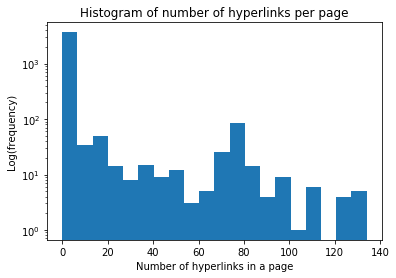

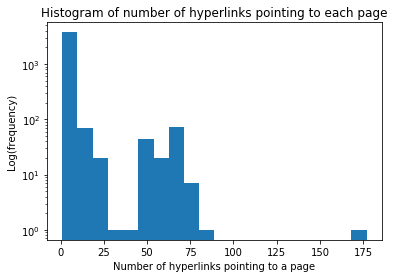

In [23]:
# Plot histograms

outdegrees = np.array(list(dict(G.out_degree()).values()))
plt.hist(outdegrees, bins=20, log=True)
plt.title('Histogram of number of hyperlinks per page')
plt.xlabel('Number of hyperlinks in a page')
plt.ylabel('Log(frequency)')
plt.show()

indegrees = np.array(list(dict(G.in_degree()).values()))
plt.hist(indegrees, bins=20, log=True)
plt.title('Histogram of number of hyperlinks pointing to each page')
plt.xlabel('Number of hyperlinks pointing to a page')
plt.ylabel('Log(frequency)')
plt.show()

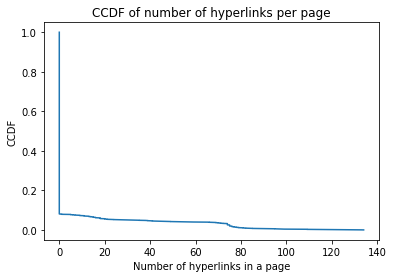

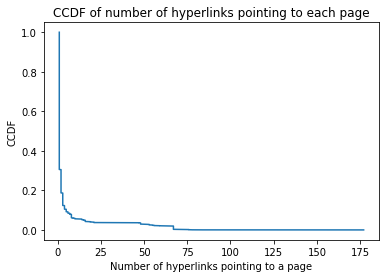

In [10]:
# Plot ccdf

plt.plot(np.sort(outdegrees), np.linspace(1, 0, len(outdegrees), endpoint=False))
plt.title('CCDF of number of hyperlinks per page')
plt.xlabel('Number of hyperlinks in a page')
plt.ylabel('CCDF')
plt.show()

plt.plot(np.sort(indegrees), np.linspace(1, 0, len(indegrees), endpoint=False))
plt.title('CCDF of number of hyperlinks pointing to each page')
plt.xlabel('Number of hyperlinks pointing to a page')
plt.ylabel('CCDF')
plt.show()

In [12]:
# Compute clustering coefficients

UG = nx.Graph(G)
print('Average clustering coefficient = ', average_clustering(UG))
print('Overall clustering coefficient = ', transitivity(UG))

Average clustering coefficient =  0.18680679733790628
Overall clustering coefficient =  0.4496175442760291


In [13]:
# Compute average and maximal diameters
print('Average diamater = ', avg_diameter(UG))
print('Maximal diamater = ', max_diameter(UG))

Average diamater =  3.7551280929767556
Maximal diamater =  6
